In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install yellowbrick

# Exploring customer dataset and its features

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Pre-processing the dataset :
Before feeding the data to the k-means clustering algorithm, we need to pre-process the dataset. Let’s implement the necessary pre-processing for the customer dataset

In [5]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df=df.drop('CustomerID',axis=1)

In [10]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# Renaming columns for better readability
df.columns = ["Gender", "Age", "AnnualIncome", "SpendingScore"]

In [12]:
df

Gender  Age  AnnualIncome  SpendingScore
0      Male   19            15             39
1      Male   21            15             81
2    Female   20            16              6
3    Female   23            16             77
4    Female   31            17             40
..      ...  ...           ...            ...
195  Female   35           120             79
196  Female   45           126             28
197    Male   32           126             74
198    Male   32           137             18
199    Male   30           137             83

[200 rows x 4 columns]

In [13]:
gender_mapping = {'Male': 0, 'Female': 1}

In [14]:
df['Gender'] = df['Gender'].map(gender_mapping)

In [15]:
df

Gender  Age  AnnualIncome  SpendingScore
0         0   19            15             39
1         0   21            15             81
2         1   20            16              6
3         1   23            16             77
4         1   31            17             40
..      ...  ...           ...            ...
195       1   35           120             79
196       1   45           126             28
197       0   32           126             74
198       0   32           137             18
199       0   30           137             83

[200 rows x 4 columns]

In [16]:
df.columns

Index(['Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

### Annual Income Distribution:

<Axes: xlabel='AnnualIncome', ylabel='Density'>

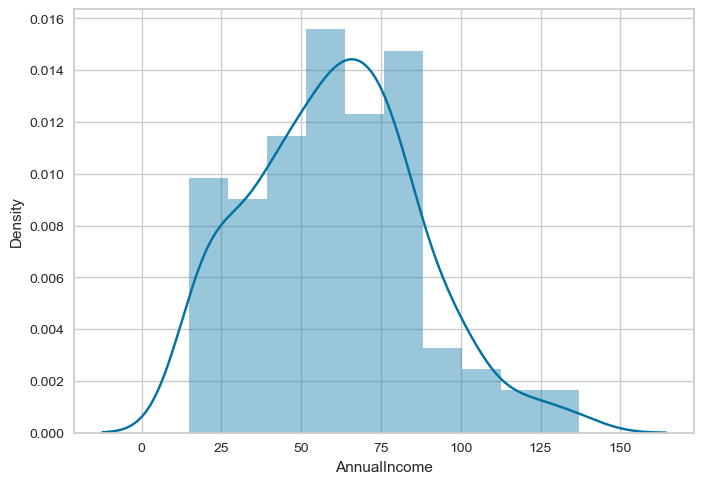

In [17]:
sns.distplot(df['AnnualIncome'])

Most of the annual income falls between 50K to 85K.

In [18]:
df.columns

Index(['Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

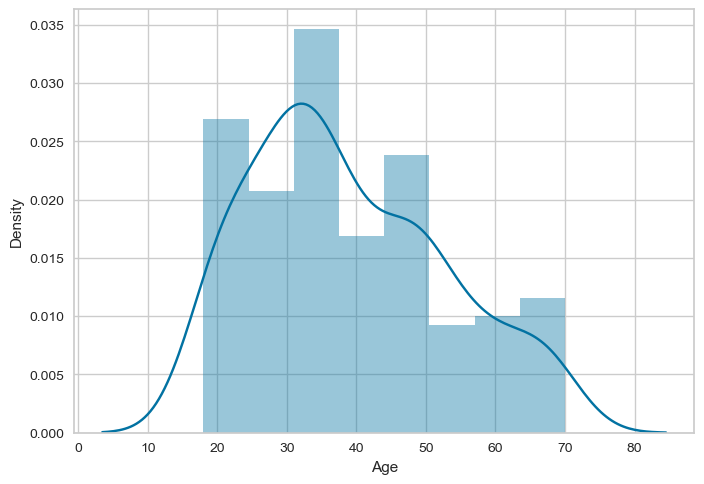

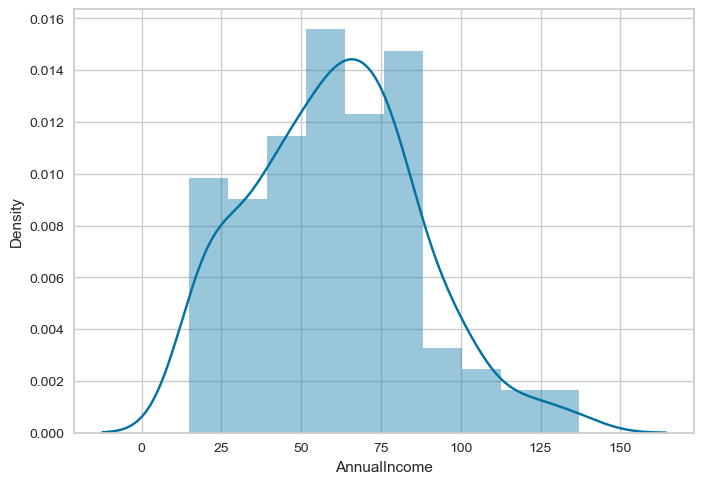

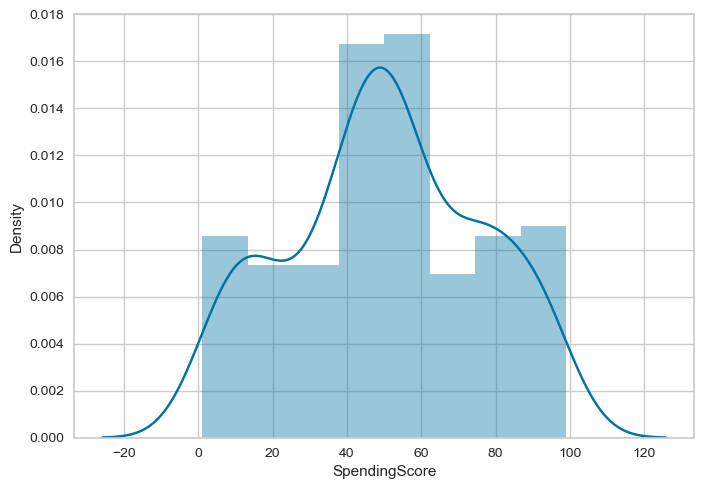

In [19]:
columns = ['Age', 'AnnualIncome','SpendingScore']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

There are customers of a wide variety of ages. The maximum spending score is in the range of 40 to 60.

### From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56. In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution. From the histogram, we conclude that customers between class 40 and 50 have the highest spending score among all the classes.

In [20]:
#sns.kdeplot(dataset['Annual Income (k$)'],shade=True,hue=dataset['Gender'])

In [21]:
mean_age = df['Age'].mean()
min_age = df['Age'].min()
max_age = df['Age'].max()

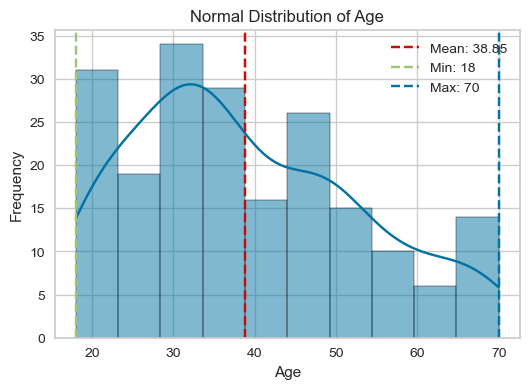

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=10)
plt.axvline(mean_age, color='r', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(min_age, color='g', linestyle='--', label=f'Min: {min_age}')
plt.axvline(max_age, color='b', linestyle='--', label=f'Max: {max_age}')
plt.title('Normal Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Gender Analysis:

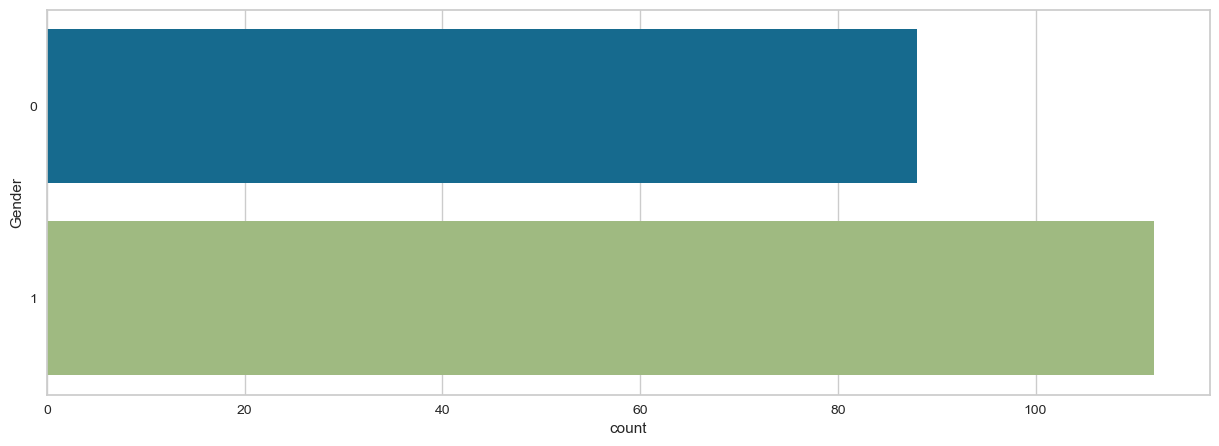

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

From the above countplot, we observe that the number of females is higher than the males.

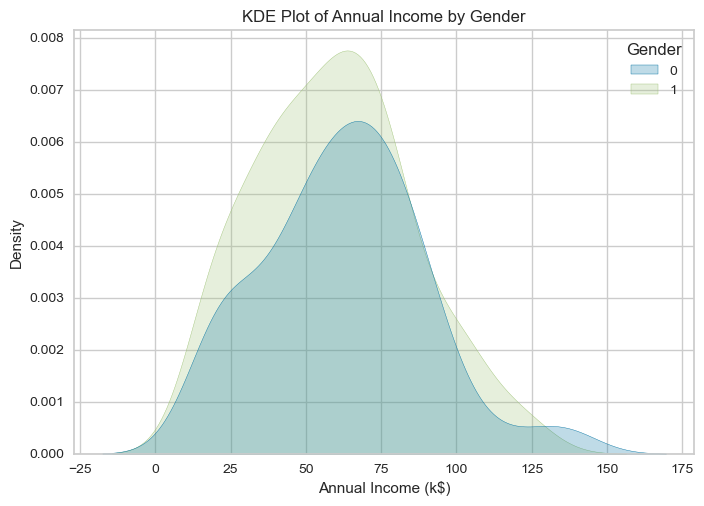

In [27]:
long_df = pd.melt(df, id_vars='Gender', value_vars=['AnnualIncome'], var_name='Variable', value_name='Value')
plt.figure()
sns.kdeplot(data=long_df, x='Value', hue='Gender', shade=True)
plt.title('KDE Plot of Annual Income by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

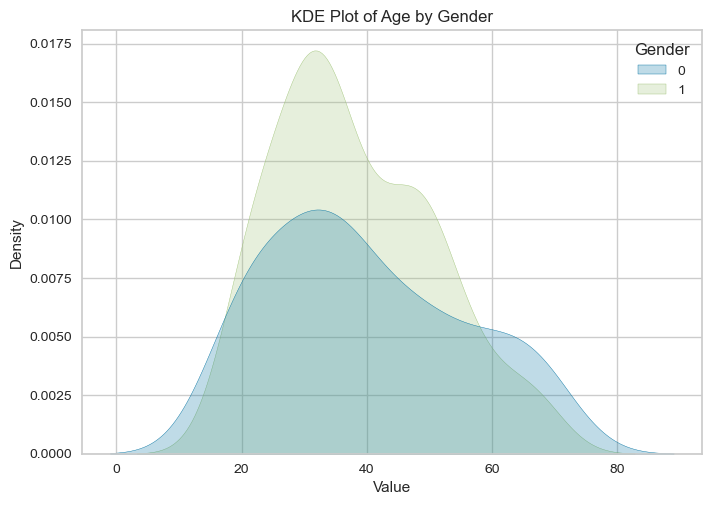

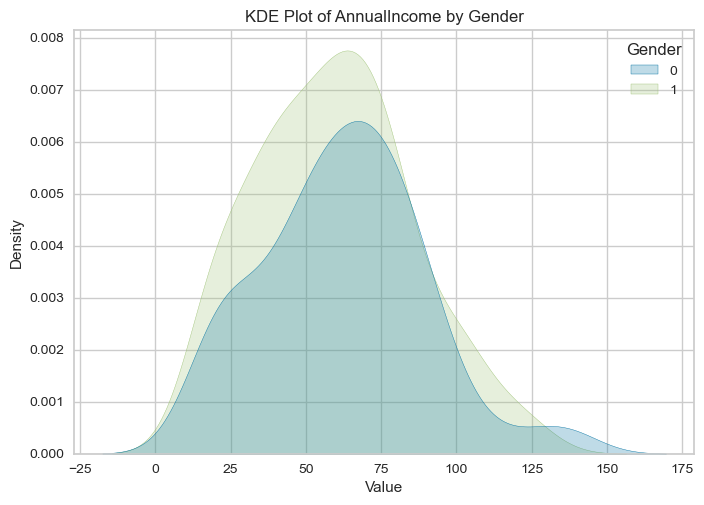

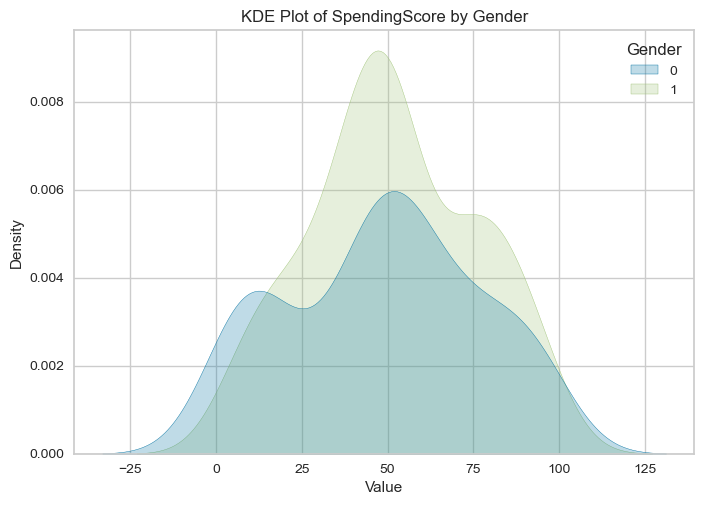

In [28]:
for i in columns:
    plt.figure()
    long_df = pd.melt(df, id_vars='Gender', value_vars=[i], var_name='Variable', value_name='Value')
    sns.kdeplot(data=long_df, x='Value', hue='Gender', shade=True)
    plt.title(f'KDE Plot of {i} by Gender')
    plt.show()

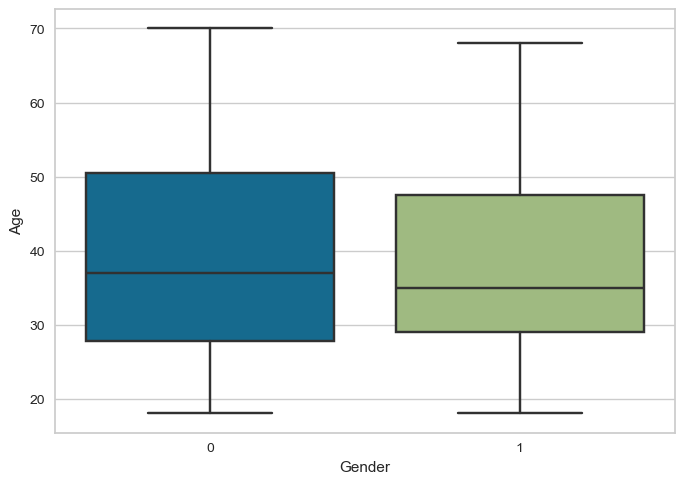

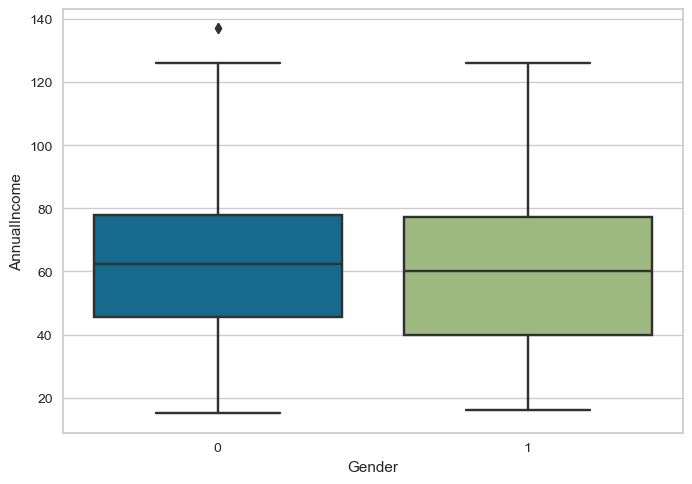

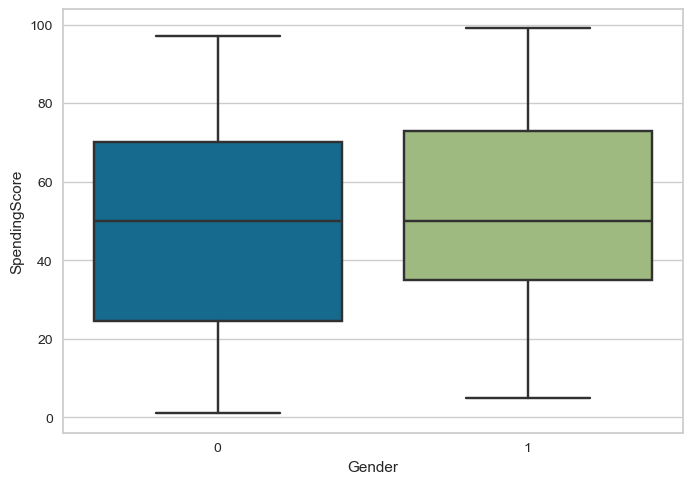

In [29]:
columns = ['Age', 'AnnualIncome','SpendingScore']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

### From the above visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70. The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. 

In [30]:
df['Gender'].value_counts()

Gender
1    112
0     88
Name: count, dtype: int64

### Bivariate Clustering

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

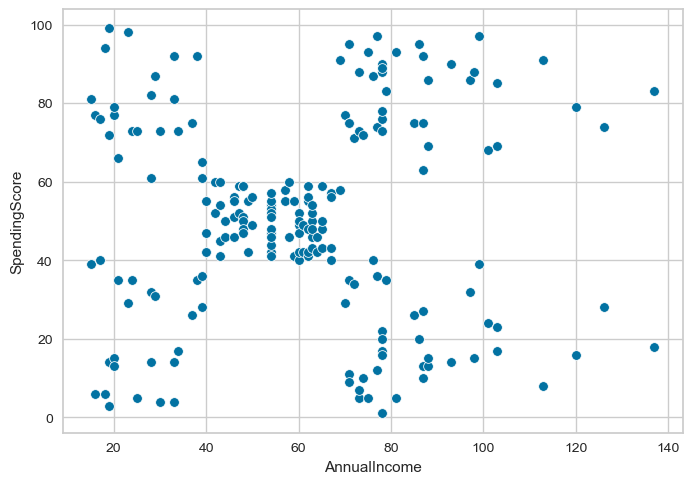

In [31]:
sns.scatterplot(data=df, x='AnnualIncome',y='SpendingScore' )

The data does seem to hold some patterns.

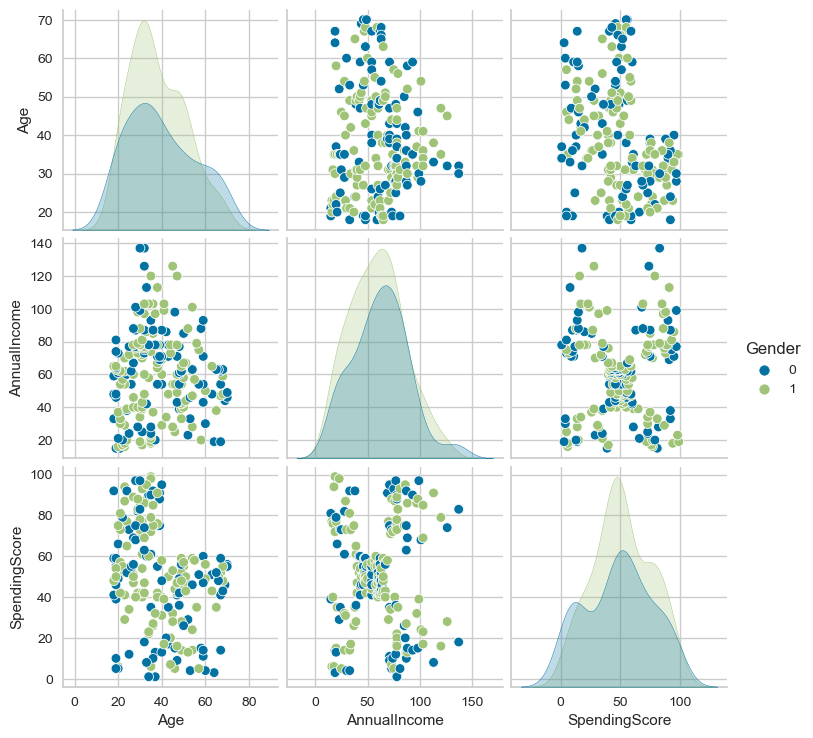

In [32]:
sns.pairplot(df,hue='Gender')

In [33]:
df.groupby(['Gender'])[['Age', 'AnnualIncome', 'SpendingScore']].mean()

Age  AnnualIncome  SpendingScore
Gender                                        
0       39.806818     62.227273      48.511364
1       38.098214     59.250000      51.526786

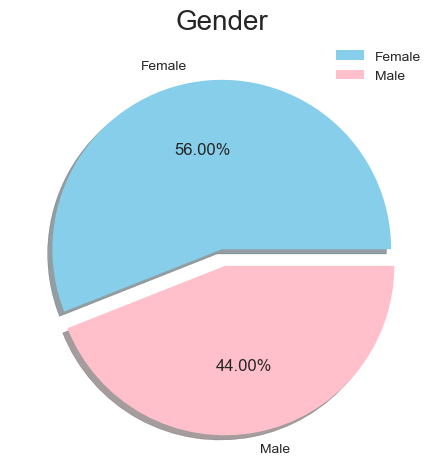

In [34]:
labels=["Female","Male"]
size=df['Gender'].value_counts()
colors=['skyblue','pink']
explode=[0,0.1]

plt.rcParams['figure.figsize']==(9,9)
plt.pie(size,colors=colors,explode=explode, labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

We also create a corresponding pie chart to illustrate the gender propositions for both men and women. In comparison to men, who have a share of 44%, women have a higher share of 56%.

In [36]:
numeric_dataset = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_dataset.corr()
correlation_matrix

Gender       Age  AnnualIncome  SpendingScore
Gender         1.000000 -0.060867     -0.056410       0.058109
Age           -0.060867  1.000000     -0.012398      -0.327227
AnnualIncome  -0.056410 -0.012398      1.000000       0.009903
SpendingScore  0.058109 -0.327227      0.009903       1.000000

<Axes: >

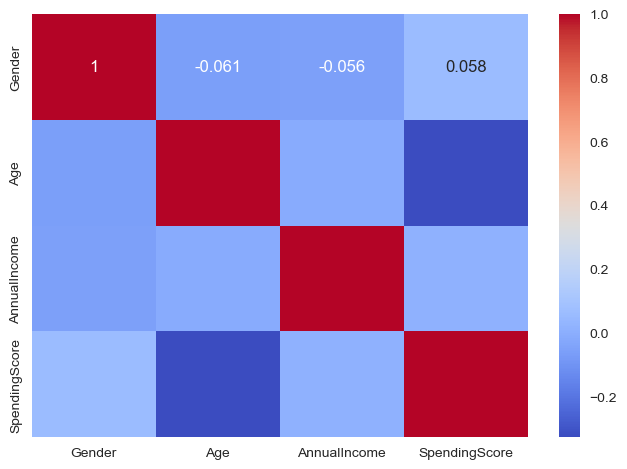

In [37]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

### Age Buckets

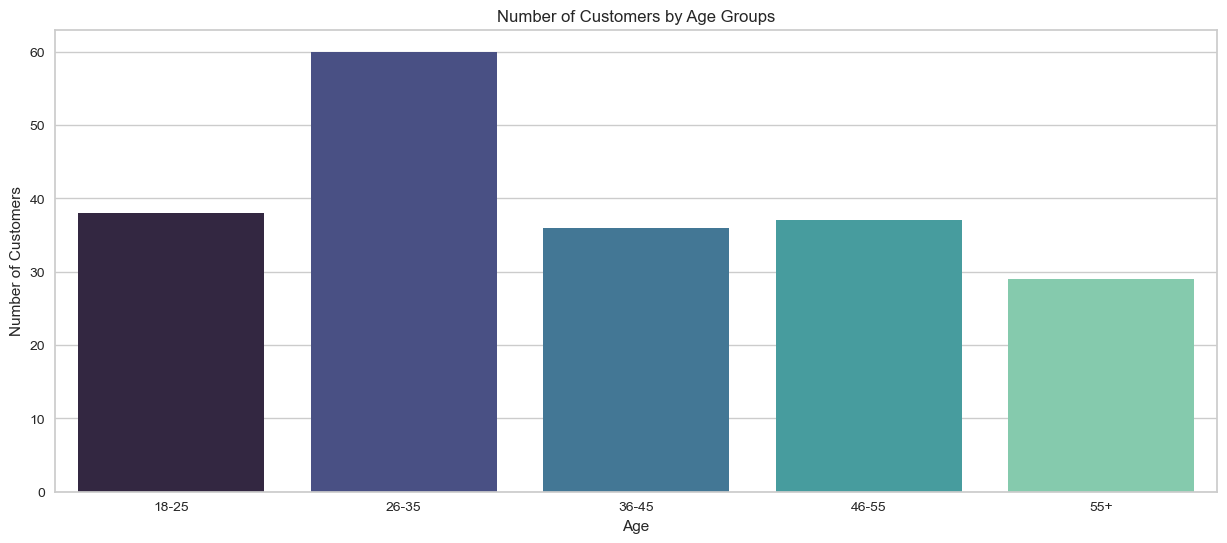

In [38]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]
agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]
plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customers by Age Groups")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

The distribution of each Age group of customers is shown in greater detail in the graph above. It demonstrates how commonplace the age range of 26 to 35 is.

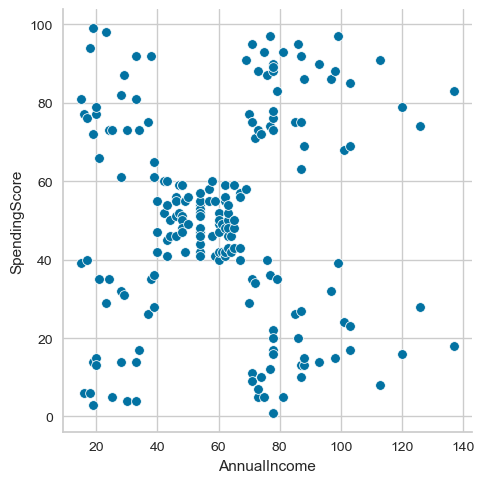

In [40]:
sns.relplot(x="AnnualIncome",y='SpendingScore',data=df)

There seems to be some patterns in the data.

### Spending Score Buckets

Text(0, 0.5, 'Number')

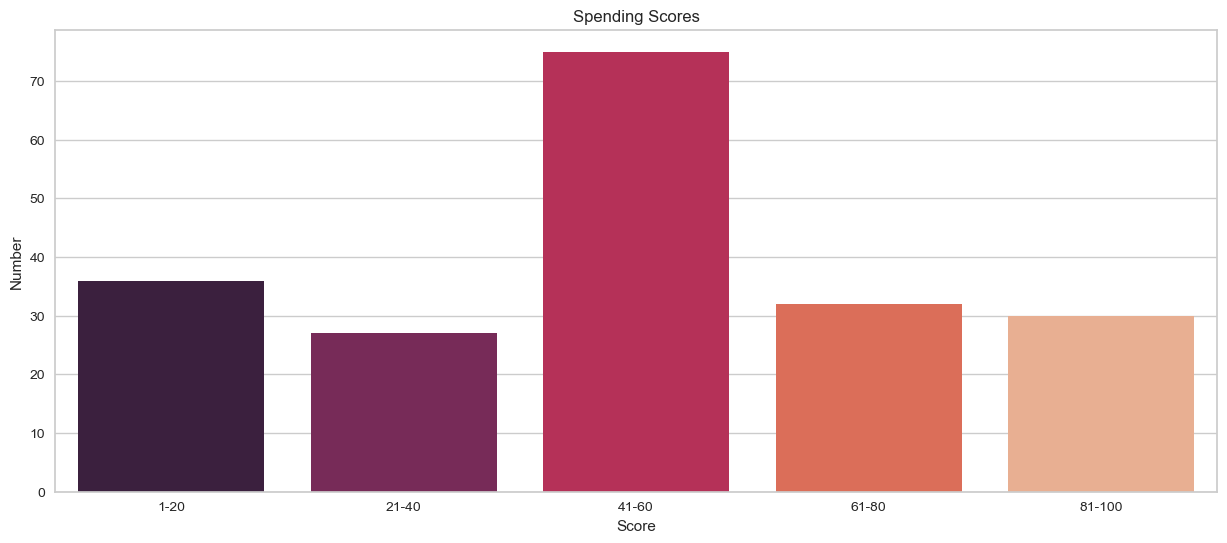

In [41]:
ss_1_20=df["SpendingScore"][(df["SpendingScore"]>=1)&(df["SpendingScore"]<=20)]
ss_21_40=df["SpendingScore"][(df["SpendingScore"]>=21)&(df["SpendingScore"]<=40)]
ss_41_60=df["SpendingScore"][(df["SpendingScore"]>=41)&(df["SpendingScore"]<=60)]
ss_61_80=df["SpendingScore"][(df["SpendingScore"]>=61)&(df["SpendingScore"]<=80)]
ss_81_100=df["SpendingScore"][(df["SpendingScore"]>=81)&(df["SpendingScore"]<=100)]
ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number")

### Annual Income (1000 USD)

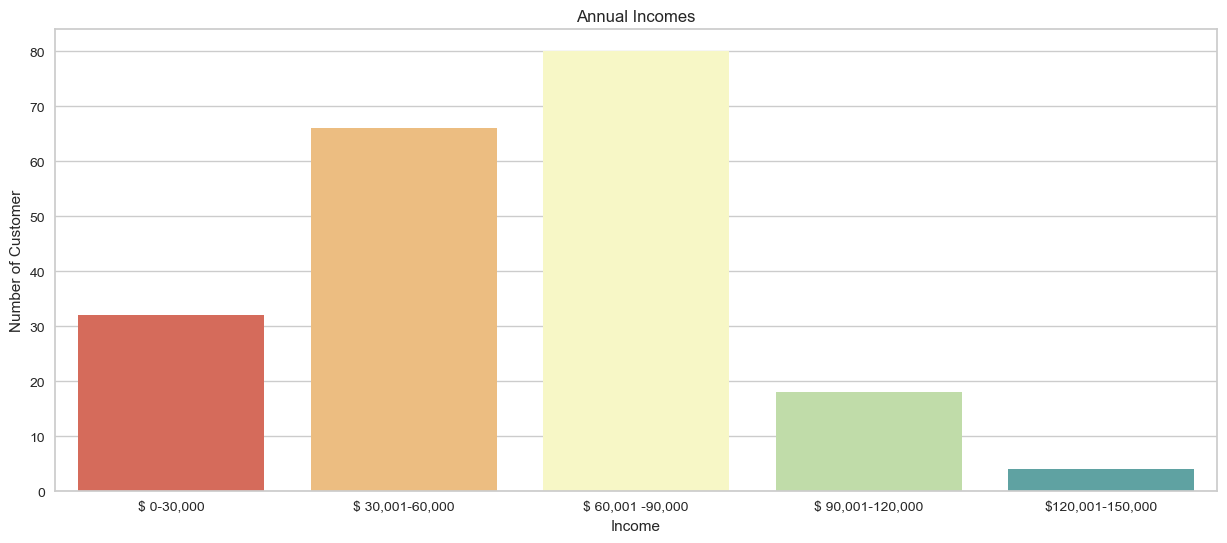

In [42]:
ai0_30=df["AnnualIncome"][(df["AnnualIncome"]>=0)&(df["AnnualIncome"]<=30)]
ai31_60=df["AnnualIncome"][(df["AnnualIncome"]>=31)&(df["AnnualIncome"]<=60)]
ai61_90=df["AnnualIncome"][(df["AnnualIncome"]>=61)&(df["AnnualIncome"]<=90)]
ai91_120=df["AnnualIncome"][(df["AnnualIncome"]>=91)&(df["AnnualIncome"]<=120)]
ai121_150=df["AnnualIncome"][(df["AnnualIncome"]>=121)&(df["AnnualIncome"]<=150)]

aix=["$ 0-30,000","$ 30,001-60,000","$ 60,001 -90,000","$ 90,001-120,000","$120,001-150,000"]
aiy=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [43]:
"""#Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
      # Finalize and render the figure"""

'#Import ElbowVisualizer\nfrom yellowbrick.cluster import KElbowVisualizer\nmodel = KMeans()\n# k is range of number of clusters.\n      # Finalize and render the figure'

### K-Means Clustering

KMeans is one of the simple but popular unsupervised learning algorithm. Here K indicates the number of clusters or classes the algorithm has to divide the data into. The algorithm starts with first group of randomly selected centroids, which are used as the beginning points for every cluster. It performs repetitive calculations to optimize the positions of the centroids.

For more information visit- https://en.wikipedia.org/wiki/K-means_clustering

In [44]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

### Clustering based on 2 features

Client Segmentation with Age and Spending Score

In [45]:
X1 = df[["Age", "SpendingScore"]]

Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. 
Next, we choose the k for which WSS first starts to diminish.

In [46]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)  

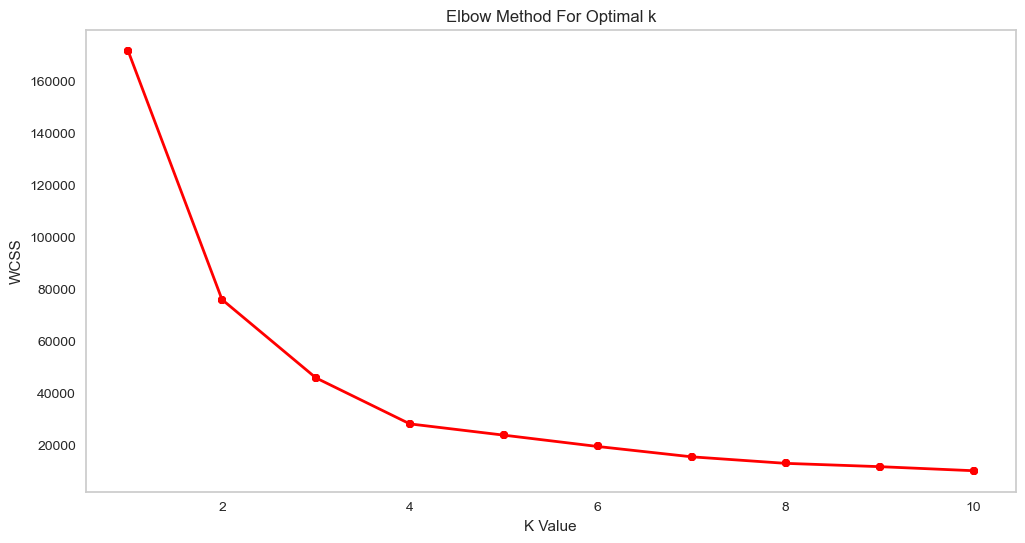

In [47]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.show()

In [48]:
#this is known as the elbow graph , the x axis being the number of clusters
#the number of clusters is taken at the elbow joint point
#this point is the point where making clusters is most relevant
#the numbers of clusters is kept at maximum

### From the above graph, we conclude that 4 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.

In [49]:
#Taking 4 clusters
km1 = KMeans(n_clusters=4)

In [50]:
"""## Fitting the Input Data and Predicting the labels of the input data
label = kmeans.fit_predict(X1)
print(label)"""

'## Fitting the Input Data and Predicting the labels of the input data\nlabel = kmeans.fit_predict(X1)\nprint(label)'

In [51]:
#print(kmeans.cluster_centers_)

In [52]:
km1.fit(X1)

KMeans(n_clusters=4)

In [53]:
y=km1.predict(X1)

In [54]:
X1["label"] = y

In [55]:
X1.head()

Age  SpendingScore  label
0   19             39      0
1   21             81      1
2   20              6      3
3   23             77      1
4   31             40      0

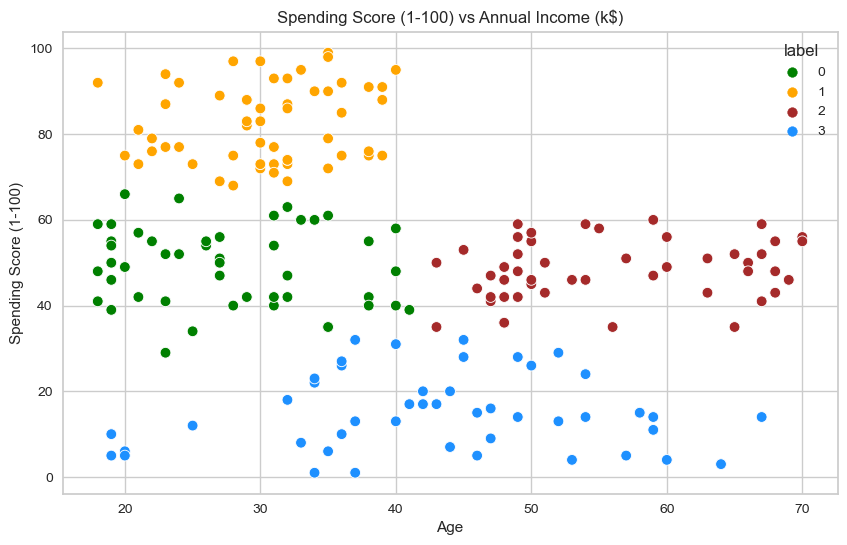

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'SpendingScore',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = X1  ,s = 60 )

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### Finding the Optimal Number of Clusters with the Elbow Method.The elbow method finds the value of the optimal number of clusters using the total within-cluster sum of square values.

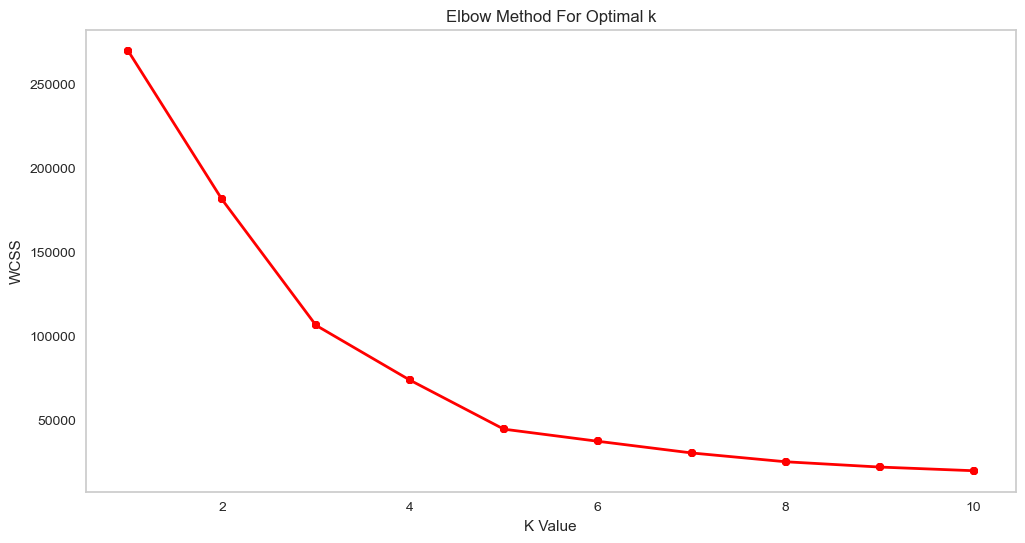

In [57]:
X2 = df.loc[:, ["AnnualIncome", "SpendingScore"]].values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.show()

In [58]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 1 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [59]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


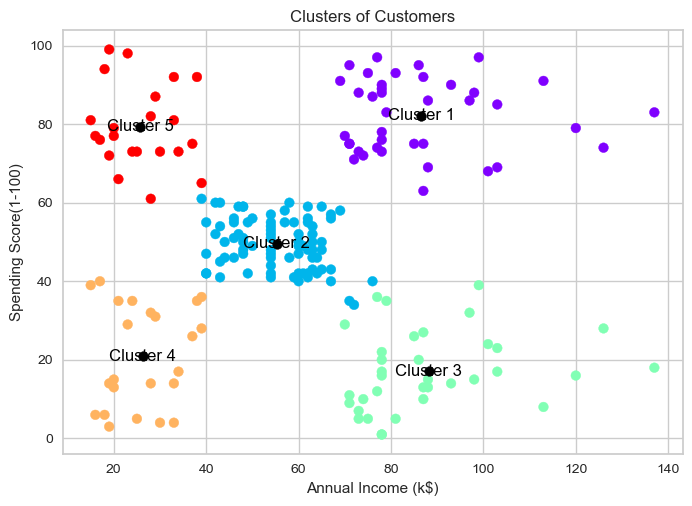

In [60]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
for i, center in enumerate(kmeans.cluster_centers_):
    plt.text(center[0], center[1], f'Cluster {i+1}', color='black', fontsize=12, ha='center', va='center')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

3rd Cluster – This cluster denotes the customer_data with low annual income as well as low yearly spend of income.

In [61]:
df1 = df[["AnnualIncome", "SpendingScore"]]

In [62]:
df1_cluster = df1.copy()
df1_cluster["Cluster"] = kmeans.fit_predict(df1)

In [63]:
df1_cluster.head()

AnnualIncome  SpendingScore  Cluster
0            15             39        2
1            15             81        4
2            16              6        2
3            16             77        4
4            17             40        2

### Evaluation with Silhouette Score

In [64]:
labels = kmeans.labels_

In [65]:
silhouette_score(df1, labels)

0.553931997444648

In [66]:
silhouette = {}
for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

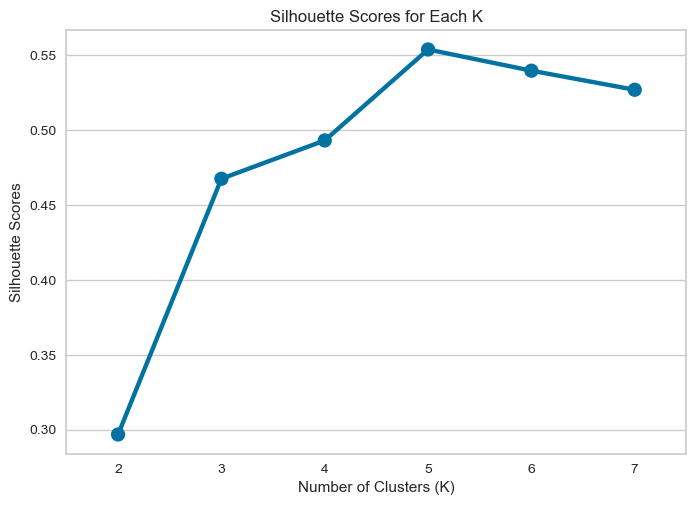

In [67]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

### Clustering based on  3 features

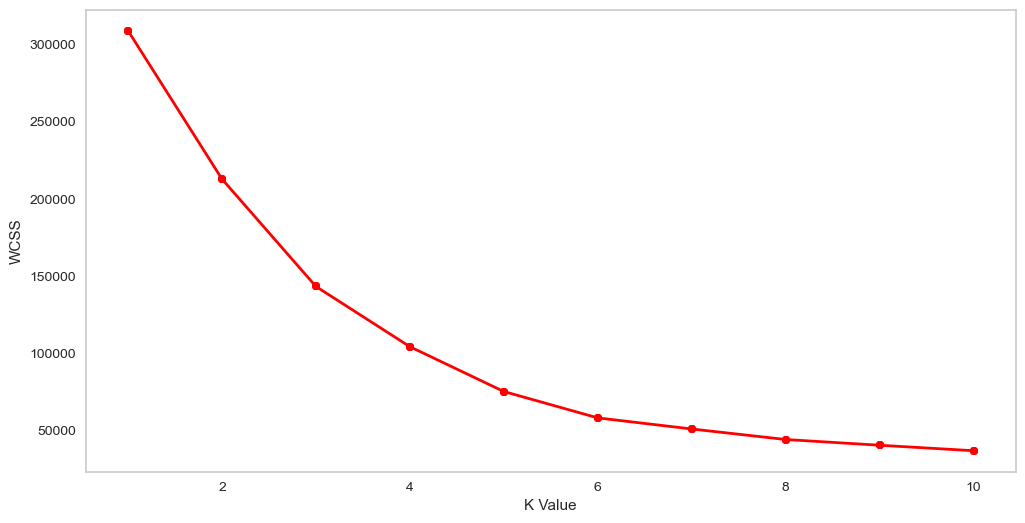

In [68]:
X3=df.iloc[:,1:]
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [69]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [70]:
print(kmeans.cluster_centers_)

[[43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]
 [25.52173913 26.30434783 78.56521739]
 [32.69230769 86.53846154 82.12820513]]


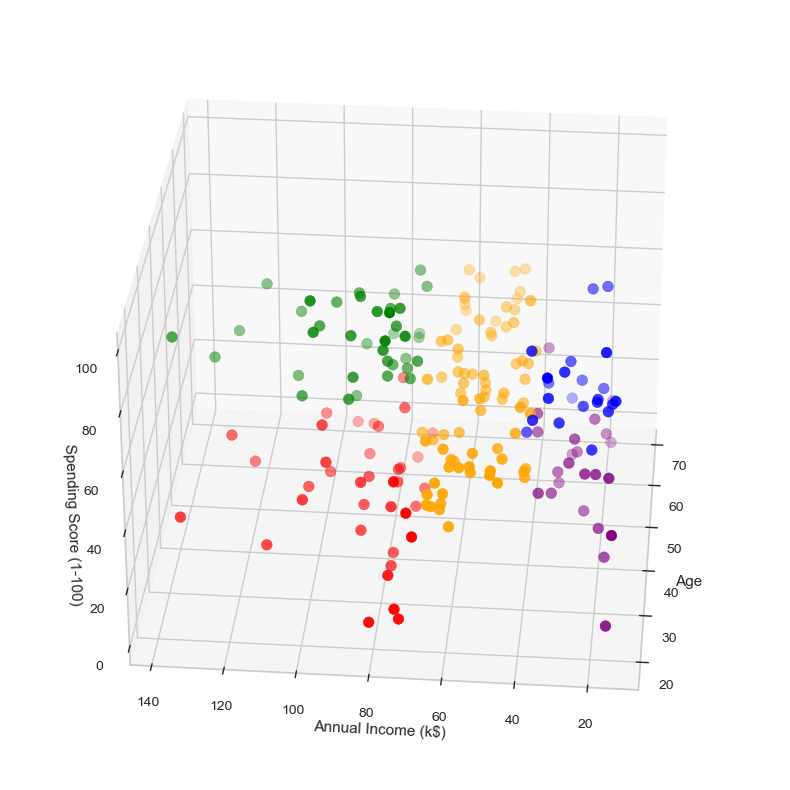

In [71]:
clusters=kmeans.fit_predict(X3)
df['label'] = clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label==0],df['AnnualIncome'][df.label==0],df["SpendingScore"][df.label==0],c='blue',s=60)
ax.scatter(df.Age[df.label==1],df['AnnualIncome'][df.label==1],df["SpendingScore"][df.label==1],c='red',s=60)
ax.scatter(df.Age[df.label==2],df['AnnualIncome'][df.label==2],df["SpendingScore"][df.label==2],c='green',s=60)
ax.scatter(df.Age[df.label==3],df['AnnualIncome'][df.label==3],df["SpendingScore"][df.label==3],c='orange',s=60)
ax.scatter(df.Age[df.label==4],df['AnnualIncome'][df.label==4],df["SpendingScore"][df.label==4],c='purple',s=60)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

In [72]:
#gender_mapping = {'Male': 0, 'Female': 1}

In [73]:
#df['Gender'] = df['Gender'].map(gender_mapping)

In [74]:
kmeans_model=KMeans(init='k-means++',max_iter=400,random_state=42)

In [75]:
kmeans_model.fit(df[['Gender','Age','AnnualIncome','SpendingScore']])

KMeans(max_iter=400, random_state=42)

### Finding the optimal number of clusters

For implementing the elbow method, the below function named “try_different_clusters” is created first. It takes two values as input:

1. K (number of clusters),
2. data (input data).

In [76]:
# Create the K means model for different values of K
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [77]:
outputs = try_different_clusters(12,df[['Gender','Age','AnnualIncome','SpendingScore']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

Using the below code, we plot the value of K (on the x-axis) against corresponding values of inertia on the Y-axis.

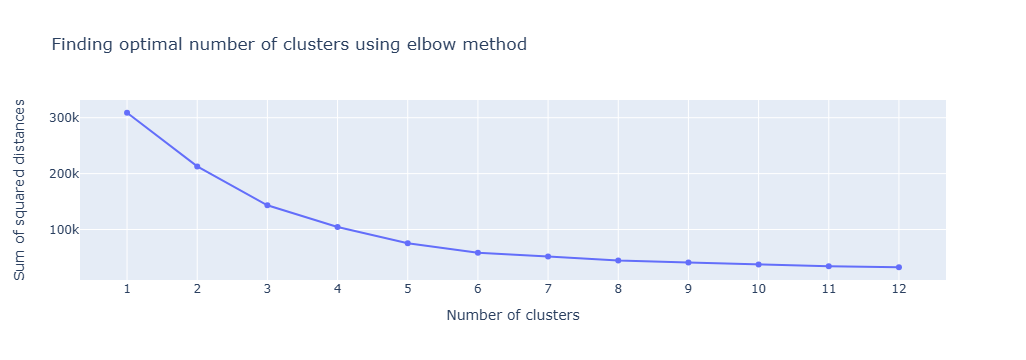

In [78]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

Optimal value of K = 5

In [79]:
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(df[['Gender','Age','AnnualIncome','SpendingScore']])

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### Visualizing customer segments

In [80]:
# Create data arrays
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[8.38032401e-01, 4.34173717e+19, 2.65358566e+11, 1.20898074e+09,
        6.08695652e-01, 4.52173913e+01, 2.63043478e+01, 2.09130435e+01],
       [7.13368881e-01, 1.57793399e+14, 3.82980197e+37, 4.65399911e+35,
        5.38461538e-01, 3.26923077e+01, 8.65384615e+01, 8.21282051e+01],
       [6.26591118e-01, 3.25560375e+17, 9.36317078e+37, 7.93349385e+07,
        4.86486486e-01, 4.03243243e+01, 8.74324324e+01, 1.81891892e+01],
       [7.90112525e-01, 5.36582750e+18, 6.44514846e+23, 4.39802724e+21,
        5.82278481e-01, 4.31265823e+01, 5.48227848e+01, 4.98354430e+01],
       [8.05629151e-01, 9.45814564e+10, 1.49009027e+11, 2.93217129e+34,
        5.90909091e-01, 2.52727273e+01, 2.57272727e+01, 7.93636364e+01]])

In [81]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
df["clusters"] = kmeans_model_new.labels_

In [82]:
df.head(20)

Gender  Age  AnnualIncome  SpendingScore  label  clusters
0        0   19            15             39      4         0
1        0   21            15             81      0         4
2        1   20            16              6      4         0
3        1   23            16             77      0         4
4        1   31            17             40      4         0
5        1   22            17             76      0         4
6        1   35            18              6      4         0
7        1   23            18             94      0         4
8        0   64            19              3      4         0
9        1   30            19             72      0         4
10       0   67            19             14      4         0
11       1   35            19             99      0         4
12       1   58            20             15      4         0
13       1   24            20             77      0         4
14       0   37            20             13      4         0
15       0   22            20             79      0         4
16       1   35            21             35      4         0
17       0   20            21             66      0         4
18       0   52            23             29      4         0
19       1   35            23             98      0         4

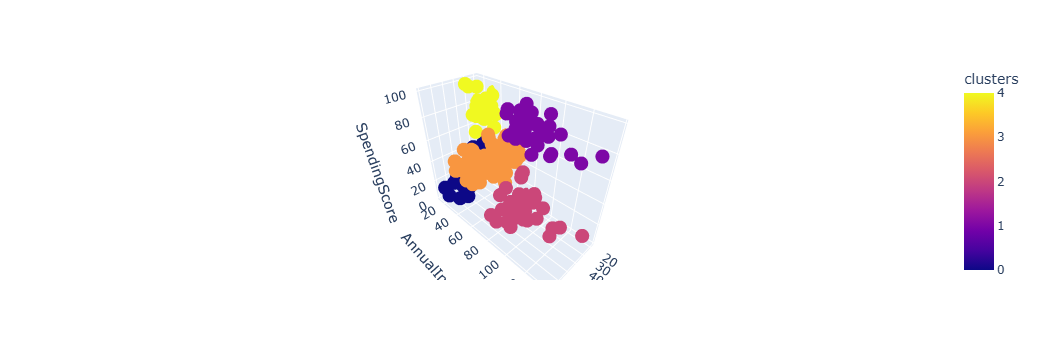

In [83]:
figure = px.scatter_3d(df,
                    color='clusters',
                    x="Age",
                    y="AnnualIncome",
                    z="SpendingScore",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

### DBSCAN

Initial Clustering

In [84]:
df1 = df[["AnnualIncome", "SpendingScore"]]

In [85]:
scaler = StandardScaler()
mall_clust_scaled = scaler.fit_transform(df1)
dbscan = DBSCAN(eps = 0.2, min_samples = 10)
cluster = dbscan.fit_predict(mall_clust_scaled)

silhouette_score(mall_clust_scaled, cluster)

0.0965528913348881

Optimizing Minimum Sample And Epsilon

In [86]:
for eps in [i/10 for i in range(2,6)]:
    for min_samples in range (6,10):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(mall_clust_scaled)
        score = silhouette_score(mall_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 6
clusters present: [-1  0  1  2  3]
clusters sizes: [95 78 10  9  8]
Silhouette Score: 0.09644483815713827

eps 0.2
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [100  78   8   7   7]
Silhouette Score: 0.05559332249286136

eps 0.2
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [116  76   8]
Silhouette Score: 0.04120506369450064

eps 0.2
\min samples 9
clusters present: [-1  0]
clusters sizes: [128  72]
Silhouette Score: 0.10238770147236753

eps 0.3
\min samples 6
clusters present: [-1  0  1  2  3  4  5]
clusters sizes: [48 10  6 87 26 14  9]
Silhouette Score: 0.24983531622925184

eps 0.3
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [72 10 82 24 12]
Silhouette Score: 0.23146493255355374

eps 0.3
\min samples 8
clusters present: [-1  0  1  2  3  4]
clusters sizes: [72 10 82 12 12 12]
Silhouette Score: 0.19432071085905328

eps 0.3
\min samples 9
clusters present: [-1  0  1  2  3]
clusters sizes: [86 82 12 10 10]


Final Result DBSCAN

In [87]:
dbscan = DBSCAN(eps = 0.4, min_samples = 8)
labels = dbscan.fit_predict(mall_clust_scaled)
df1['cluster'] = labels

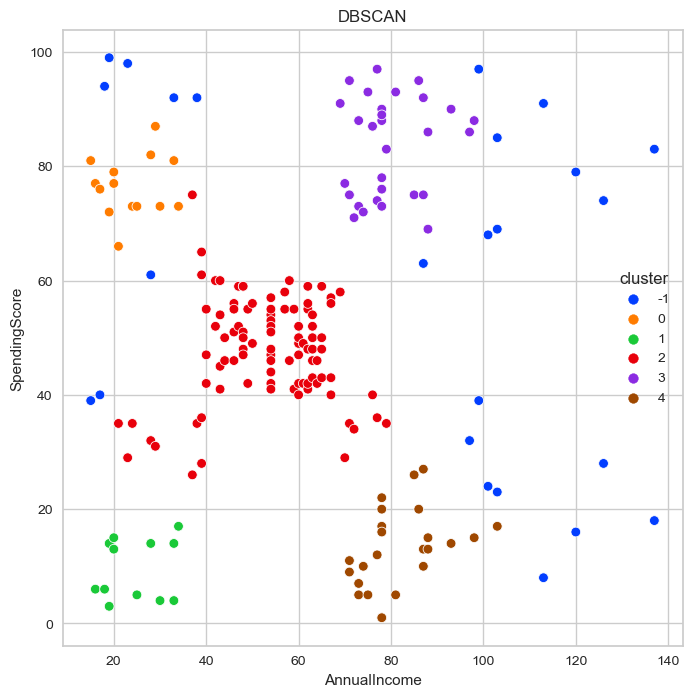

In [88]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'AnnualIncome', y = 'SpendingScore', data = df1, hue = 'cluster', palette = 'bright')
plt.title('DBSCAN')
plt.show()

In [89]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple', 'Brown']
vs_list = ['Noise', 'Low Income VS High Spending', 'Lowest Income  VS Lowest Spending',
           'Medium Income VS Medium Spending', 'High Income VS Highest Spending',
           'High Income VS Low Spending']
dbscan_summary = pd.DataFrame({
    'Color': color,
    'Cluster DBSCAN': cluster_name,
    'Annual Income VS Spending Score': vs_list
})
dbscan_summary

Color Cluster DBSCAN    Annual Income VS Spending Score
0    Blue     Cluster -1                              Noise
1  Orange      Cluster 0        Low Income VS High Spending
2   Green      Cluster 1  Lowest Income  VS Lowest Spending
3     Red      Cluster 2   Medium Income VS Medium Spending
4  Purple      Cluster 3    High Income VS Highest Spending
5   Brown      Cluster 4        High Income VS Low Spending

### Gaussian Mixture Model

In [90]:
from sklearn.mixture import GaussianMixture

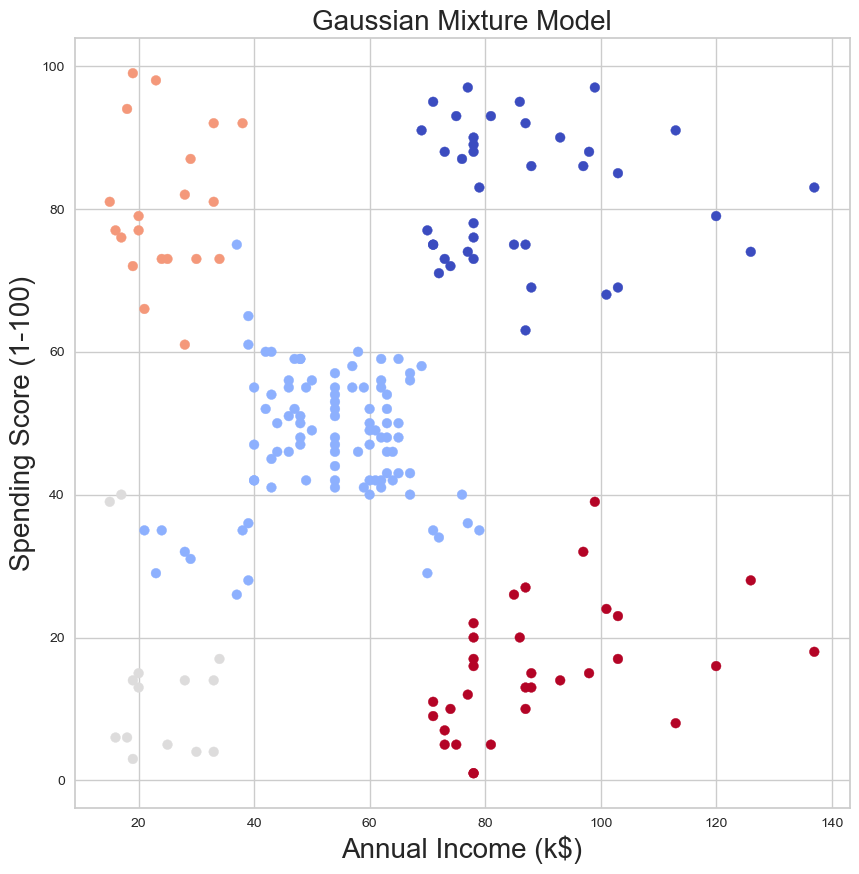

In [91]:
x = df1['AnnualIncome']
y = df1['SpendingScore']
gmm = GaussianMixture(n_components=5)
gmm.fit(df1)
gmm_y_pred = gmm.predict(df1)
plt.figure(figsize=(10,10))
plt.title('Gaussian Mixture Model', fontsize=20)
plt.xlabel('Annual Income (k$)', fontsize=20)
plt.ylabel('Spending Score (1-100)', fontsize=20)
plt.scatter(x, y, c=gmm_y_pred, cmap='coolwarm')
plt.show()